<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [6]:
# Read CSV
house_csv = r"D:\Download\DataScience\Files\Week250923_MachineLearning\Module4\Sacramento_transactions.csv"

In [7]:
# ANSWER
df=pd.read_csv(house_csv)
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [5]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [6]:
df.shape

(985, 12)

In [7]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
#There seems to be no null value, but from the describe() there seems to be 0 sq__ft houses
zero = df[df['sq__ft'] == 0]
print(zero)

                       street             city    zip state  beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA     0      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA     0      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA     0      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA     0      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA     0      0   
..                        ...              ...    ...   ...   ...    ...   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA     0      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA     0      0   
966          9197 CORTINA CIR        ROSEVILLE  95678    CA     3      2   
970             3557 SODA WAY       SACRAMENTO  95834    CA     0      0   
973      2181 WINTERHAVEN CIR     CAMERON PARK  95682    CA     3      2   

     sq__ft         type                     sale_date   price   latitude  \
73        

In [9]:
#Will try to make a comparison for linear regression later between df containing zero and one without
non_zero_df = df[df['sq__ft'] != 0]

In [10]:
print(non_zero_df)

                  street             city    zip state  beds  baths  sq__ft  \
0           3526 HIGH ST       SACRAMENTO  95838    CA     2      1     836   
1            51 OMAHA CT       SACRAMENTO  95823    CA     3      1    1167   
2         2796 BRANCH ST       SACRAMENTO  95815    CA     2      1     796   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1     852   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA     2      1     797   
..                   ...              ...    ...   ...   ...    ...     ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3    2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2    1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2    1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2    1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2    1362   

            type                     sale_date   pr

In [11]:
import folium
import pandas as pd

# Make an empty map using Mapbox tiles
# Replace 'your_mapbox_token' and 'your_map_style_url' with your Mapbox token and style URL
m = folium.Map(
    location=[38.575764, -121.478851],
    tiles="OpenStreetMap",  # Replace with your Mapbox style URL
    zoom_start=10
)

# I can add a circle/marker one by one on the map
for i in range(0, len(df.head(1000))):
    folium.Marker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']]
    ).add_to(m)

display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# The target variable is price because that is the variable we are trying to predict

In [12]:
df.corr()

C:\Users\GGPC\AppData\Local\Temp\ipykernel_15844\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.2 List all possible variables which might be Predictor variable.

Based on the correlation matrix, the best predictor would be:
- sq_ft
- beds
- baths

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

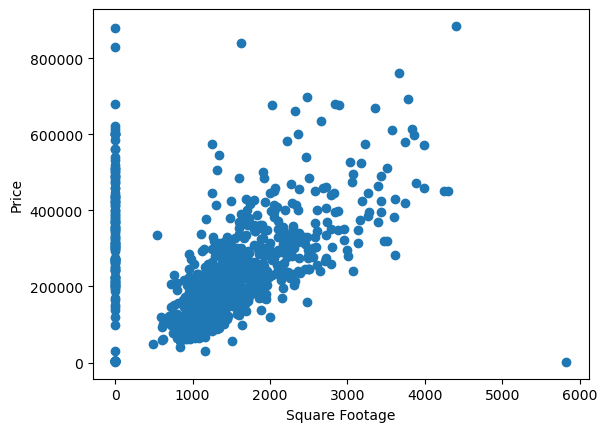

In [9]:
# ANSWER
# From the scatter plot, although sq_feet has less correlation value compared to beds and baths,
# It looks like it has more linear relationship compared to the other two
plt.scatter(df['sq__ft'], df['price'])
plt.xlabel("Square Footage")
plt.ylabel("Price");

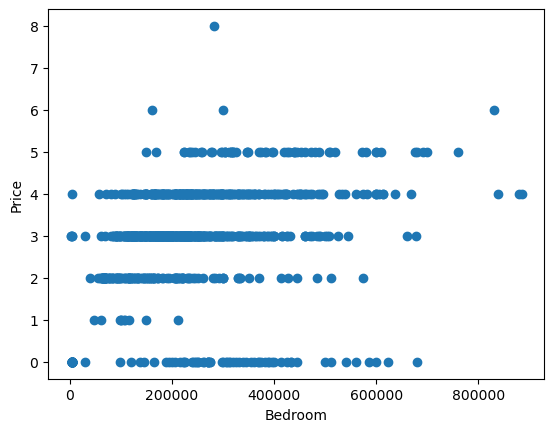

In [10]:
plt.scatter(df['price'], df['beds'])
plt.xlabel("Bedroom")
plt.ylabel("Price");

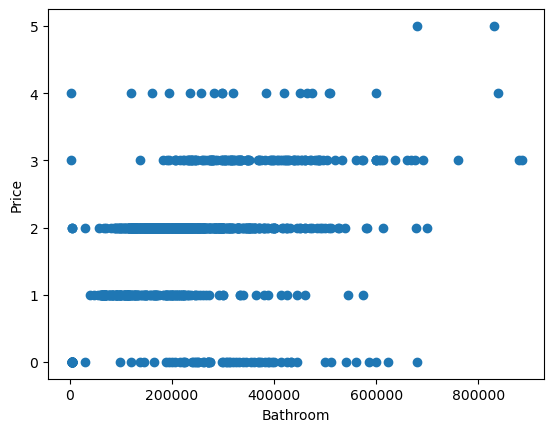

In [11]:
plt.scatter(df['price'], df['baths'])
plt.xlabel("Bathroom")
plt.ylabel("Price");

Although the other variable may have slightly higher correlation value, visually we can see from the three graphs above, the square footage vs price has more obvious shape indicating linear relation 

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [16]:
#The easiest way would be the mean of all the houses which would be:
mean_price = df['price'].mean()
mean_price

234144.26395939087

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [17]:
# ANSWER
# First, I would calculate the difference between each Y value (Price) with the mean above
residuals = np.sum(np.abs(df['price'] - mean_price))
residuals

101900387.0253807

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [18]:
# ANSWER
X = df['sq__ft']
y = df['price']

x_bar = X.mean()
y_bar = y.mean()

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [19]:
# ANSWER
beta_1 = np.sum((y - y_bar) * (X - x_bar)) / np.sum((X - x_bar) ** 2)
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [21]:
# ANSWER
beta_0 = y_bar - beta_1 * x_bar
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [22]:
# ANSWER
Yhat = beta_0 + beta_1 * X
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [24]:
# ANSWER
residual = df['price'] - Yhat
residual

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [28]:
# ANSWER
SStotal = np.sum((df['price'] - y_bar) ** 2)
SSres = np.sum(residual ** 2)
R2 = 1 - (SSres / SStotal)
R2

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

Text(0.5, 1.0, 'Regression Line of house price')

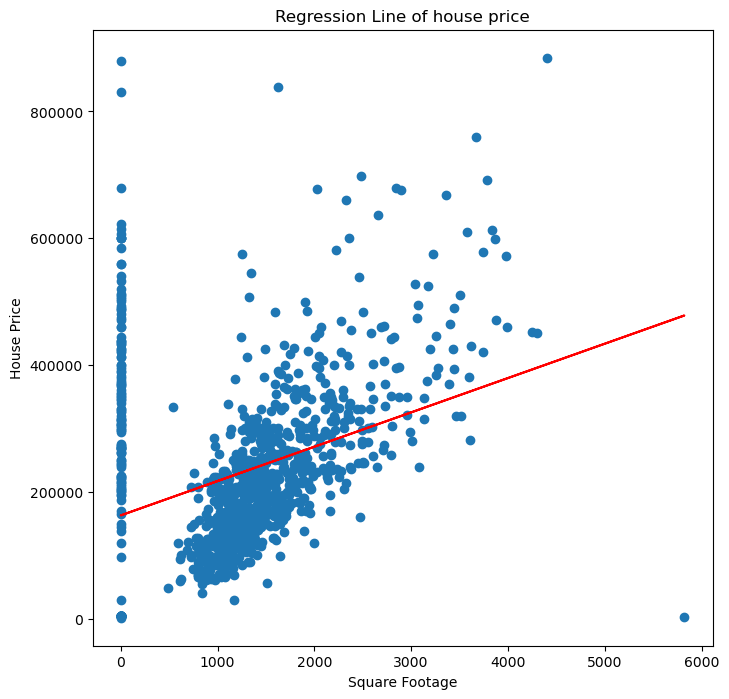

In [32]:
# ANSWER
plt.figure(figsize=(8, 8))
plt.scatter(df['sq__ft'], df['price'])
plt.plot(df['sq__ft'], Yhat, color='red')

plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('Regression Line of house price')


##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

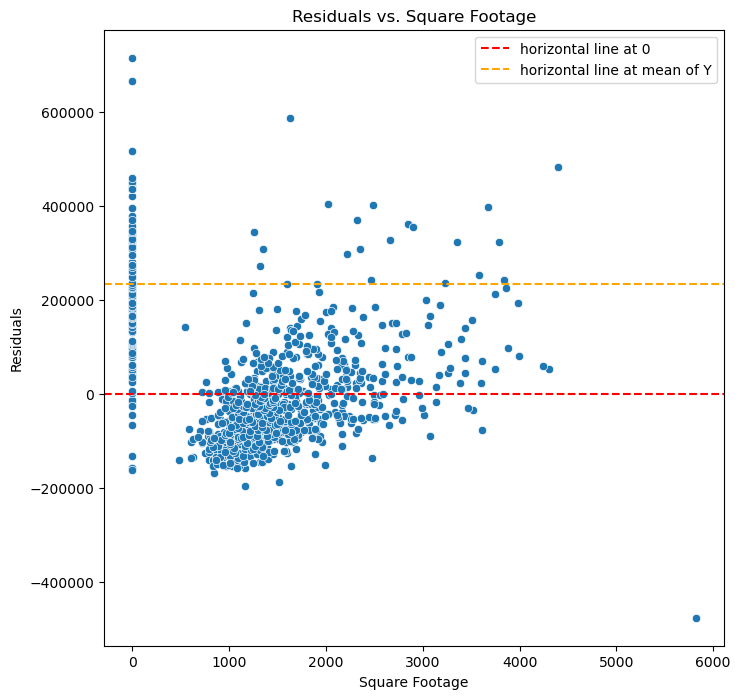

In [59]:
# ANSWER
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['sq__ft'], y=residual)

# Reference lines
plt.axhline(0, color='red', linestyle='--', label = 'horizontal line at 0')
plt.axhline(y_bar, color='orange', linestyle='--', label = 'horizontal line at mean of Y')

plt.xlabel('Square Footage')
plt.ylabel('Residuals')
plt.title('Residuals vs. Square Footage')
plt.legend()
plt.show()


### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [48]:
# ANSWER
predicted_price = beta_0 + beta_1 * 1204
print(f'Predicted price of a house with 1204 square foot is {predicted_price}')

Predicted price of a house with 1204 square foot is 228137.1635919888




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



